['A', '0.125650150591298', 'FALSE\n']
(0.19616364841610875, 0.8036409729284506, 0.00019537865544056428)


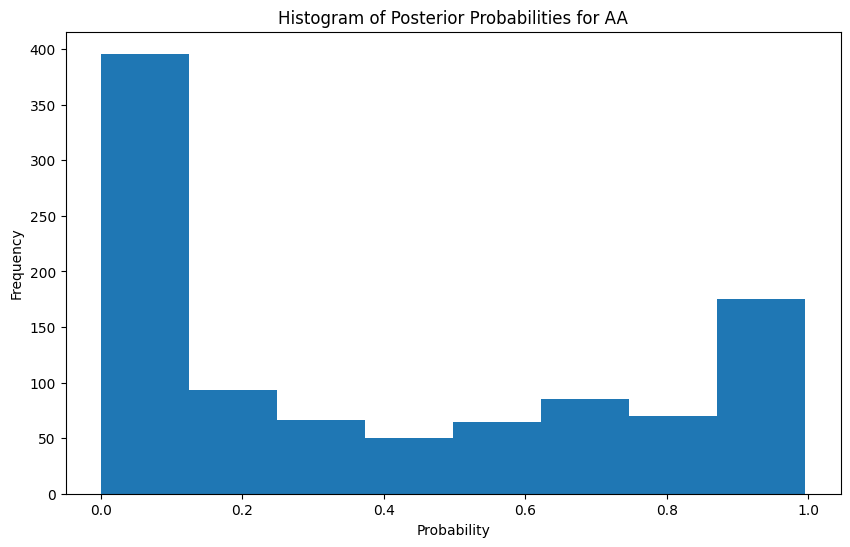

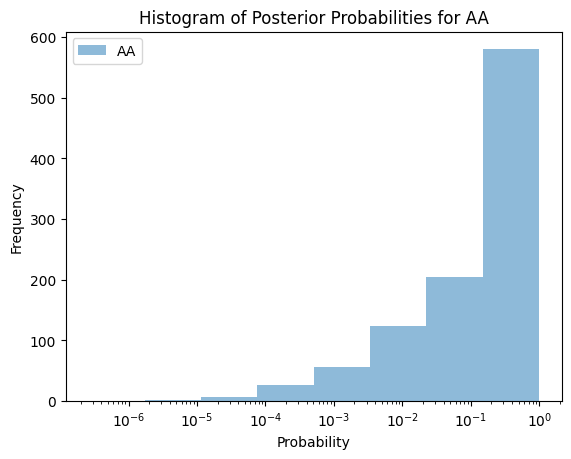

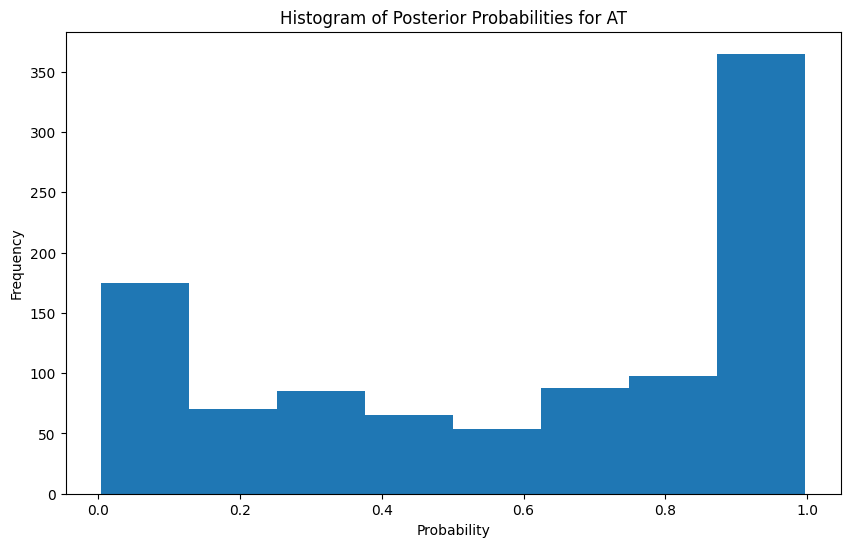

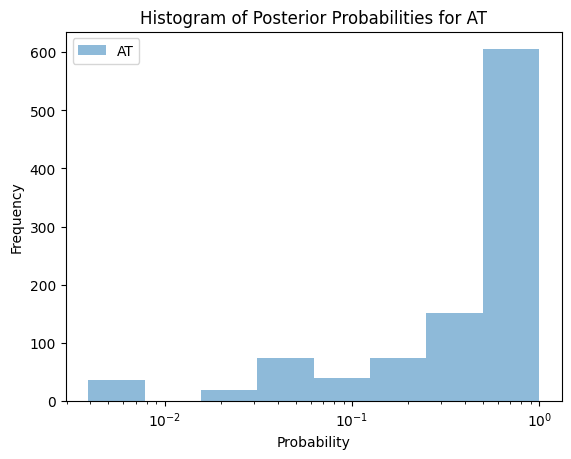

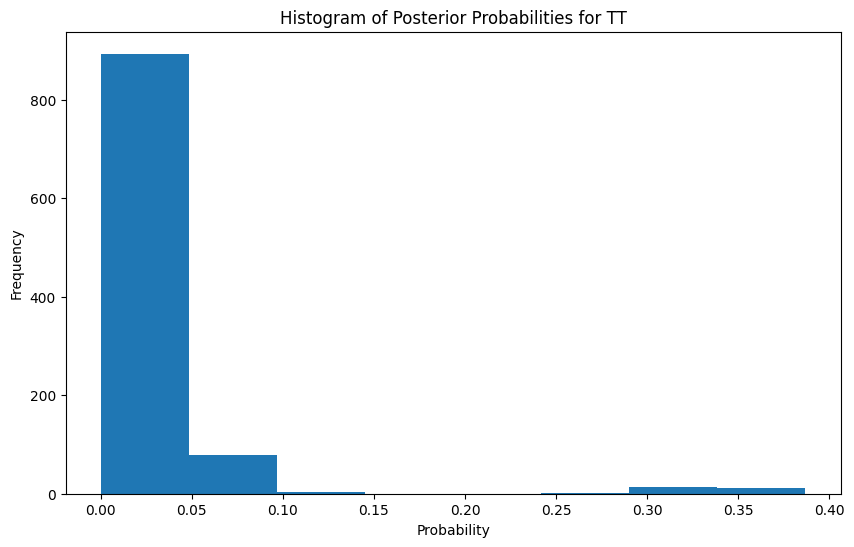

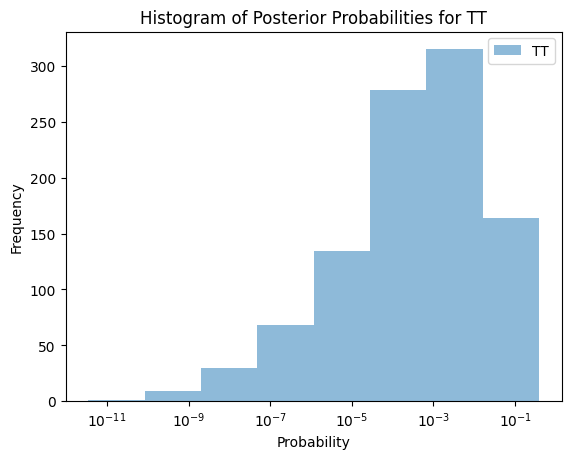

AA mean: 0.38997838394871664 AA std: 0.36608424443219784
AT mean: 0.5921969453578586 AT std: 0.3519360720261516
TT mean: 0.017824670693424784 TT std: 0.05579429107406581


In [69]:
import os
import sys
import numpy as np

lines = []
with open('reads.tsv', 'r') as file:
   for line in file:
         lines.append(line.split('\t'))

print(lines[1])
#remove the first line 
lines.pop(0)


# 5 random numbers
import random 
random.seed(1)
random_reads = random.sample(lines, 5)


posterior_probabilities = []

def randomsample(n, reads):
    for i in range(n):
        random_reads = random.sample(reads, 5)
        posterior_probabilities.append(random_reads)
    return posterior_probabilities

samples_1000 = randomsample(1000, lines)

def calculate_posterior(sample):
    length = len(sample)
    AA_errors = []
    AT_errors = []
    TT_errors = []

    for i in range(length):
        if sample[i][0] == 'T':
            AA_errors.append(float(sample[i][1]))
            AT_errors.append(0.5)
            TT_errors.append(1- float(sample[i][1]))
        else:
            AA_errors.append(1- float(sample[i][1]))
            AT_errors.append(0.5)
            TT_errors.append(float(sample[i][1]))
    return AA_errors, AT_errors, TT_errors

def calculate_posterior_probabilities(AA_errors, AT_errors, TT_errors, n=5):
    multAA = 1
    multAT = 1
    multTT = 1
    for i in range(n):
        multAA = multAA * AA_errors[i]
        multAT = multAT * AT_errors[i]
        multTT = multTT * TT_errors[i]
    return multAA, multAT, multTT
#testing function

AA, AT, TT = calculate_posterior(random_reads)
AAprobs_sample, ATprobs_sample, TTprobs_sample = calculate_posterior_probabilities(AA, AT, TT)

def normalized_probs(AAprobs_sample, ATprobs_sample, TTprobs_sample):
    AAprobs = 0.95**2
    TTprobs= 0.05**2
    ATprobs = 1- AAprobs - TTprobs
    AAprobs_sample = AAprobs_sample * AAprobs
    ATprobs_sample = ATprobs_sample * ATprobs
    TTprobs_sample = TTprobs_sample * TTprobs
    total = AAprobs_sample + ATprobs_sample + TTprobs_sample
    return AAprobs_sample/total, ATprobs_sample/total, TTprobs_sample/total

print(normalized_probs(AAprobs_sample, ATprobs_sample, TTprobs_sample))


#for 1000 different samples of 50 reads each
def samples1000(samples_1000):
    posterior_probabilities = []
    for i in range(1000):
        AA, AT, TT = calculate_posterior(samples_1000[i])
        AAprobs_sample, ATprobs_sample, TTprobs_sample = calculate_posterior_probabilities(AA, AT, TT)
        posterior_probabilities.append(normalized_probs(AAprobs_sample, ATprobs_sample, TTprobs_sample))
    return posterior_probabilities


import matplotlib.pyplot as plt

# Assuming you have already defined the function 'samples1000'
posterior_probabilities = samples1000(samples_1000)

# Extracting probabilities for each category
AA_probs = ([prob[0] for prob in posterior_probabilities])
AT_probs = ([prob[1] for prob in posterior_probabilities])
TT_probs = ([prob[2] for prob in posterior_probabilities])
import matplotlib.pyplot as plt
def plot_histogram_log_scale(data, title):
    plt.figure(figsize=(10, 6))
    
    # Compute non-equal bin sizes for log scale
    bins = 8
        
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
    plt.title('Histogram of Posterior Probabilities for ' + title)
    hist, bins, _ = plt.hist(data, bins=bins, alpha=1, label=title)
    logbins = np.logspace(np.log10(bins[0]), np.log10(bins[-1]), len(bins))
    
    # Plot histogram on log scale
    plt.figure()
    plt.hist(data, bins=logbins, alpha=0.5, label=title)
    plt.xscale('log')
    
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
    plt.title('Histogram of Posterior Probabilities for ' + title)
    plt.legend()
    plt.show()

# Plot histograms for each category
plot_histogram_log_scale(AA_probs, 'AA')
plot_histogram_log_scale(AT_probs, 'AT')
plot_histogram_log_scale(TT_probs, 'TT')

# mean and standard deviation 
AA_mean = np.mean(AA_probs)
AT_mean = np.mean(AT_probs)
TT_mean = np.mean(TT_probs)

AA_std = np.std(AA_probs)
AT_std = np.std(AT_probs)
TT_std = np.std(TT_probs)

print('AA mean:', AA_mean, 'AA std:', AA_std)
print('AT mean:', AT_mean, 'AT std:', AT_std)
print('TT mean:', TT_mean, 'TT std:', TT_std)
